In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load the dataset into python environment

In [2]:
df = pd.read_csv(r'C:\Users\ASUS\Downloads\Titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Make ‘PassengerId’ as the index column

In [6]:
df = pd.read_csv(r'C:\Users\ASUS\Downloads\Titanic.csv', index_col = 'PassengerId')

In [7]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Check the basic details of the dataset

In [8]:
df.shape

(891, 11)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [10]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

## Fill in all the missing values present in all the columns in the dataset

In [28]:
freq_graph = df.select_dtypes(include = 'float')

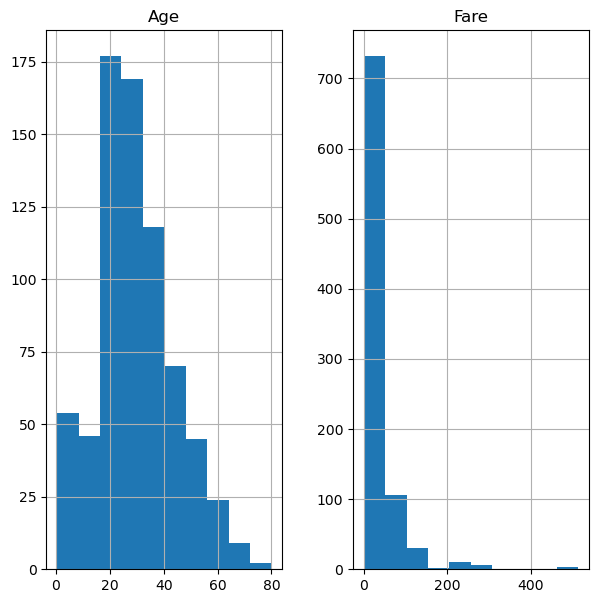

In [31]:
freq_graph.hist(figsize = [7,7])
plt.show()

In [32]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [33]:
df['Age'].isna().sum()

0

## Check and handle outliers in at least 3 columns in the dataset

Text(0.5, 1.0, 'Boxplot for Survived')

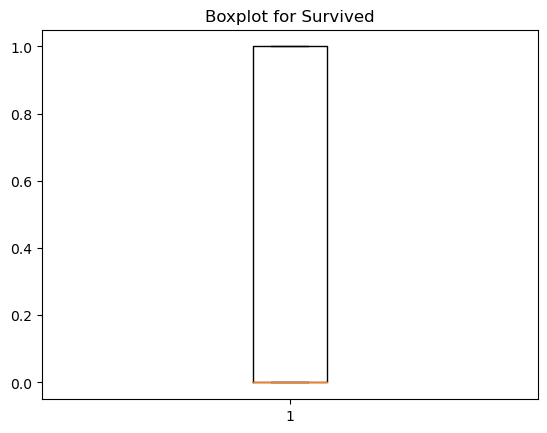

In [52]:
plt.boxplot(df['Survived'])
plt.title('Boxplot for Survived')

Text(0.5, 1.0, 'Boxplot for Fare')

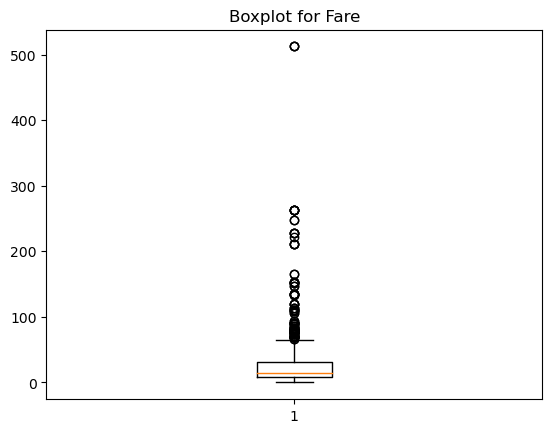

In [53]:
plt.boxplot(df['Fare'])
plt.title('Boxplot for Fare')

Text(0.5, 1.0, 'Boxplot for Pclass')

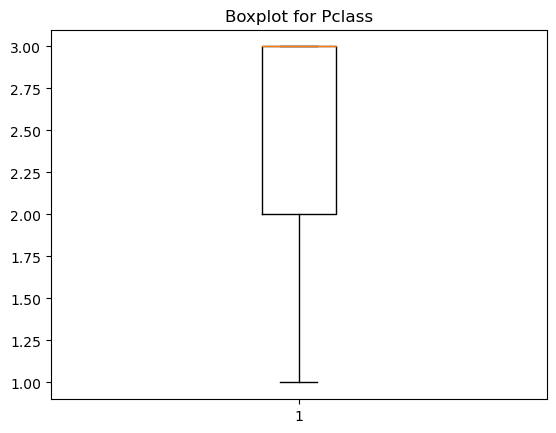

In [54]:
plt.boxplot(df['Pclass'])
plt.title('Boxplot for Pclass')

Text(0.5, 1.0, 'Boxplot for Age')

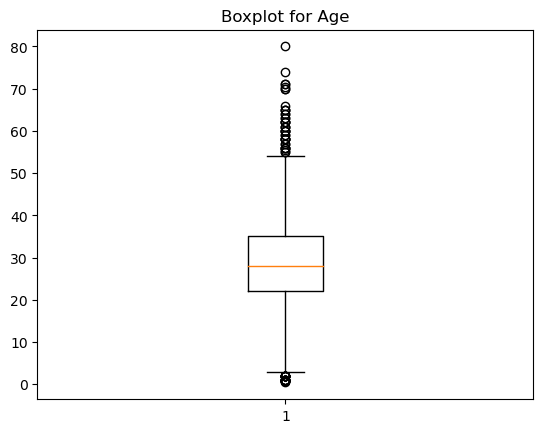

In [55]:
plt.boxplot(df['Age'])
plt.title('Boxplot for Age')

In [56]:
Q1 = np.percentile(df['Fare'],25)

In [57]:
Q2 = np.percentile(df['Fare'],50)

In [58]:
Q3 = np.percentile(df['Fare'],75)

In [59]:
IQR = Q3-Q1

In [60]:
low_limit = Q1 - 1.5 * IQR
upr_limit = Q3 + 1.5 * IQR

In [61]:
low_limit

-26.724

In [62]:
upr_limit

65.6344

In [63]:
outlier = []
for x in df['Fare']:
    if x>upr_limit or x<low_limit:
        outlier.append(x)

In [64]:
outlier

[71.2833,
 263.0,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 263.0,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 69.55,
 69.55,
 146.5208,
 69.55,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 153.4625,
 135.6333,
 77.9583,
 78.85,
 91.0792,
 151.55,
 247.5208,
 151.55,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 69.55,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 263.0,
 75.25,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 263.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 79.2,
 78.2667,
 153.4625,
 77.9583,
 69.3,
 76.7292,
 73.5,
 113.275,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 71.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 69.55,
 120.0,
 93.5,
 80.0,
 83.1583,
 6

In [67]:
ind = df['Fare']>upr_limit
a = df.loc[ind].index


In [68]:
a

Int64Index([  2,  28,  32,  35,  53,  62,  63,  73,  89, 103,
            ...
            793, 803, 821, 830, 836, 847, 850, 857, 864, 880],
           dtype='int64', name='PassengerId', length=116)

In [69]:
df.drop(a,inplace = True)

In [70]:
Q1 = np.percentile(df['Age'],25)

In [71]:
Q2 = np.percentile(df['Age'],50)

In [72]:
Q3 = np.percentile(df['Age'],75)

In [73]:
IQR = Q3-Q1

In [74]:
low_limit1 = Q1 - 1.5 * IQR
upr_limit1 = Q3 + 1.5 * IQR

In [75]:
low_limit1 

4.0

In [76]:
upr_limit1

52.0

In [77]:
outlier1 = []
for x in df['Age']:
    if x>upr_limit1 or x<low_limit1:
        outlier1.append(x)

In [78]:
outlier1

[54.0,
 2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 3.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 3.0,
 2.0,
 59.0,
 54.0,
 62.0,
 3.0,
 65.0,
 54.0,
 61.0,
 2.0,
 3.0,
 3.0,
 1.0,
 1.0,
 3.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 54.0,
 2.0,
 64.0,
 62.0,
 62.0,
 53.0,
 54.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 70.0,
 60.0,
 60.0,
 0.67,
 57.0,
 54.0,
 1.0,
 0.42,
 2.0,
 1.0,
 0.83,
 74.0]

In [86]:
ind = df['Age']>upr_limit1 
b = df.loc[ind].index

In [87]:
ind1 = df['Age']<low_limit1
c = df.loc[ind1].index

In [90]:
df.drop(b,inplace = True)

In [91]:
df.drop(c,inplace = True)

In [92]:
df.shape

(708, 11)

## Do min max scaling on the feature set (Take ‘Survived’ as target)

In [94]:
x = df.drop('Survived',axis = 1)

In [95]:
y = df['Survived']

In [96]:
x

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q
...,...,...,...,...,...,...,...,...,...,...
887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S


In [97]:
y

PassengerId
1      0
3      1
4      1
5      0
6      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 708, dtype: int64

In [99]:
x.Name.nunique()

708

In [100]:
x.drop('Name',axis = 1)

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,female,35.0,1,0,113803,53.1000,C123,S
5,3,male,35.0,0,0,373450,8.0500,NaN,S
6,3,male,28.0,0,0,330877,8.4583,NaN,Q
...,...,...,...,...,...,...,...,...,...
887,2,male,27.0,0,0,211536,13.0000,NaN,S
888,1,female,19.0,0,0,112053,30.0000,B42,S
889,3,female,28.0,1,2,W./C. 6607,23.4500,NaN,S
